# **PROJECT : FLOWERS RECOGNITION**

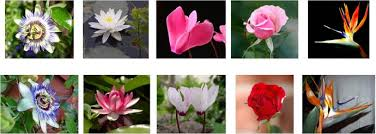

**About Dataset**

*Context* :

**This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.**

*Content* :

**The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!**

**Importing Necessary Libraries**

In [1]:
import pandas as pd
from skimage.io import imread #it is used to read images from data folder
from skimage.transform import resize #it is used to resize the image
import os #to manage files and directories
from keras.models import Sequential #for model building
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,MaxPooling2D # these are the layers used here
import matplotlib.pyplot as plt # for visualization
import seaborn as sns #for visualization
from sklearn.preprocessing import LabelEncoder #to change the datatype into integer
import  numpy as np
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')



**Store image**

In [2]:
data=[]
target=[]
categories=['rose','tulip','sunflower','dandelion','daisy']
datadir='/content/drive/MyDrive/Flowers_CNN_Project/flowers'
for category in categories:
  print("Loading Category.......",category)
  path=os.path.join(datadir,category)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_arr=imread(img_path)
    #print(img_arr)
    img_resized=resize(img_arr,(150,150,3))
    data.append(img_resized)
    target.append(categories.index(category))
  print("Completed...",category)


Loading Category....... rose
Completed... rose
Loading Category....... tulip
Completed... tulip
Loading Category....... sunflower
Completed... sunflower
Loading Category....... dandelion
Completed... dandelion
Loading Category....... daisy
Completed... daisy


**Convert list into array**

In [ ]:
X_train=np.array(data)
y_train=np.array(target)

**Find the shape of X and y**

In [ ]:
X_train.shape

In [ ]:
y_train.shape

**Model Creation**

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

**Compilation**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
c=model.fit(X_train,y_train,epochs=25,batch_size=5)

**Plotting the accuracy and loss**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(c.history['accuracy'],color='green',label='Accuracy')
plt.plot(c.history['loss'],color='red',label='loss')

**Read a new image**

In [ ]:
path1='/content/drive/MyDrive/Flowers_CNN_Project/flowers/dandelion/10437652486_aa86c14985.jpg'
img=imread(path1)
img

**Resize Image**

In [ ]:
img=resize(img,(150,150,3))
img.shape


In [ ]:

img=img.reshape(1,150,150,3)
img.shape


**Predict a new image**

In [ ]:
pred=model.predict(img)
pred


In [ ]:
pred=model.predict(img)
pred


In [ ]:

ind=pred.argmax(axis=1)
ind

In [ ]:

categories[ind.item()]

**Save the model**

In [ ]:
from keras.models import load_model
model.save('flower_model.h5')
